In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### VIB

In [ ]:
from sklearn.model_selection import train_test_split

stock_data = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VIB Historical Data.csv')
stock_data.head()
len(stock_data)

# Convert 'Date' to datetime and set as index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Focus on the 'Price' column
prices = stock_data['Price']

# Splitting the data into training and testing sets (80% train, 20% test)
train_prices, test_prices = train_test_split(prices, test_size=0.2, shuffle=False)

# Display the first few rows of the train and test sets
train_prices.head(), test_prices.head()
len(test_prices)

298

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

daily_returns = train_prices.pct_change().dropna()

drift = daily_returns.mean()
volatility = daily_returns.std()

days_to_simulate = len(test_prices)
iterations = 10  # Number of scenarios to simulate

# # Perform Monte Carlo simulation
np.random.seed(42)  # For reproducible results
future_paths = np.zeros((days_to_simulate, iterations))
initial_price = train_prices.iloc[-1]  # Last price from the training data



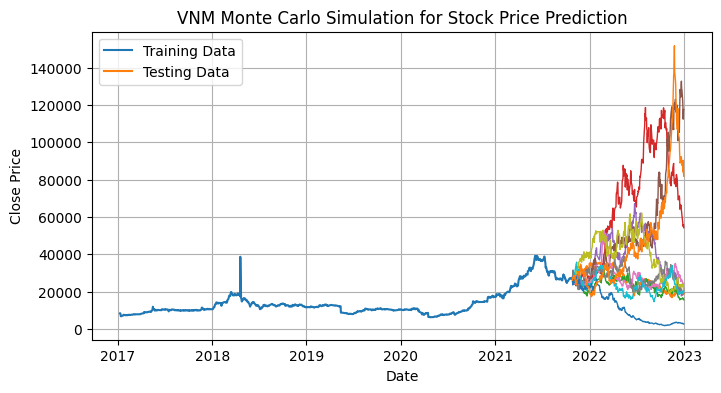

In [ ]:
future_dates_aligned = test_prices.index

# Adjusting the Monte Carlo simulation to match the length of the test data
future_paths_aligned = np.zeros((len(future_dates_aligned), iterations))

for i in range(iterations):
    random_walk = np.random.normal(drift, volatility, len(future_dates_aligned))
    future_path = initial_price * np.cumprod(1 + random_walk)
    future_paths_aligned[:, i] = future_path

# Plotting the results with the aligned dates
plt.figure(figsize=(8, 4))
plt.plot(train_prices, label='Training Data')
plt.plot(test_prices, label='Testing Data')  # Test data in red
for i in range(iterations):
    plt.plot(future_dates_aligned, future_paths_aligned[:, i], lw=1)

plt.title('VNM Monte Carlo Simulation for Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


### SNV
